In [60]:
# Revisar conexión de GPU.
!nvidia-smi --query-gpu=gpu_name --format=csv,noheader

NVIDIA GeForce GTX 1660 SUPER


In [61]:
# Corroborar que la ruta actual es '/workspace'.
!pwd
# Corroborar presencia de archivos en la ruta actual.
!ls

/workspace
Dockerfile  IAMLDL_Proy.ipynb  README.md  dataset


In [62]:
# Instalar las bibliotecas necesarias (solo chequeo en este caso)
%pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [63]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [64]:
df = pd.read_csv('dataset/CarPrice_Assignment.csv')
df.head(1)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


In [65]:
# Revisar presencia de valores nulos en el dataset.
if df.isnull().sum().sum() == 0:
    print("No hay valores nulos ✅")
else:
    print("Las siguientes columnas tienen valores nulos 👁️:")
    print(df.isnull().sum()[df.isnull().sum() > 0])

No hay valores nulos ✅


In [66]:
# Revisar si hay columnas con valores duplicados.
if df.duplicated().sum() == 0:
    print("No hay valores duplicados ✅")
else:
    print("Las siguientes columnas tienen valores duplicados 👁️:")
    print(df.duplicated().sum()[df.duplicated().sum() > 0])

No hay valores duplicados ✅


In [67]:
# Cantidad de valores únicos por columna.
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [68]:
# Estadísticas del dataset.
df.describe()

# Count = Cantidad de valores no nulos.
# Mean = Promedio.
# Std = Desviación estándar.
# Min = Valor mínimo.
# 25% = Primer cuartil.
# 50% = Mediana.
# 75% = Tercer cuartil.
# Max = Valor máximo.

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Datos a destacar sobre el dataset

- El conjunto de datos cubre 205 modelos de autos, cada uno único en atributos.
- El precio oscila entre 5,118 dólares y 45,400 dólares.
- El precio promedio de un auto es de aproximadamente $13,276.
- Los motores difieren en diámetro de cilindro (boreratio) y longitud de carrera (stroke).

In [69]:
# Distribución de las variables categoricas.
categorical_columns = [
    'fueltype',
    'aspiration',
    'doornumber',
    'carbody',
    'drivewheel',
    'enginelocation',
    'enginetype',
    'cylindernumber',
    'fuelsystem'
]

for col in categorical_columns:
    
    print(f"Las categorías en la columna '{col}' son: {df[col].unique()}")

Las categorías en la columna 'fueltype' son: ['gas' 'diesel']
Las categorías en la columna 'aspiration' son: ['std' 'turbo']
Las categorías en la columna 'doornumber' son: ['two' 'four']
Las categorías en la columna 'carbody' son: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Las categorías en la columna 'drivewheel' son: ['rwd' 'fwd' '4wd']
Las categorías en la columna 'enginelocation' son: ['front' 'rear']
Las categorías en la columna 'enginetype' son: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Las categorías en la columna 'cylindernumber' son: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Las categorías en la columna 'fuelsystem' son: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


| Columna          | Categorías                                                                 | Significado                                                                                       |
|------------------|----------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------|
| fueltype         | ['gas', 'diesel']                                                          | Tipo de combustible: gasolina o diésel                                                            |
| aspiration       | ['std', 'turbo']                                                           | Tipo de aspiración: estándar o turbo                                                              |
| doornumber       | ['two', 'four']                                                            | Número de puertas: dos o cuatro                                                                   |
| carbody          | ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']                  | Tipo de carrocería: convertible, hatchback, sedán, familiar, techo rígido                         |
| drivewheel       | ['rwd', 'fwd', '4wd']                                                      | Tipo de tracción: trasera (RWD), delantera (FWD), tracción en las cuatro ruedas (4WD)             |
| enginelocation   | ['front', 'rear']                                                          | Ubicación del motor: delantero o trasero                                                          |
| enginetype       | ['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv']                     | Tipo de motor: DOHC, OHCV, OHC, en línea (L), rotor, OHCF, DOHCV                                  |
| cylindernumber   | ['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']                 | Número de cilindros: cuatro, seis, cinco, tres, doce, dos, ocho                                   |
| fuelsystem       | ['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi']             | Sistema de combustible: MPFI, 2BBL, MFI, 1BBL, SPFI, 4BBL, IDI, SPDI                              |

<br/>

> 💡 Las abreviaciones poco conocidas se definen así:

**Definición de tipos de motores:**
- **DOHC**: Doble árbol de levas en cabeza
- **OHCV**: Válvulas en cabeza en V
- **OHC**: Árbol de levas en cabeza
- **L**: En línea
- **Rotor**: Motor rotativo
- **OHCF**: Válvulas en cabeza en F
- **DOHCV**: Doble árbol de levas en cabeza en V

**Definición de sistemas de combustible:**
- **MPFI**: Inyección de combustible multipunto
- **2BBL**: Doble barril
- **MFI**: Inyección de combustible monopunto
- **1BBL**: Un solo barril
- **SPFI**: Inyección de combustible secuencial
- **4BBL**: Cuatro barriles
- **IDI**: Inyección directa de combustible
- **SPDI**: Inyección de combustible secuencial directa

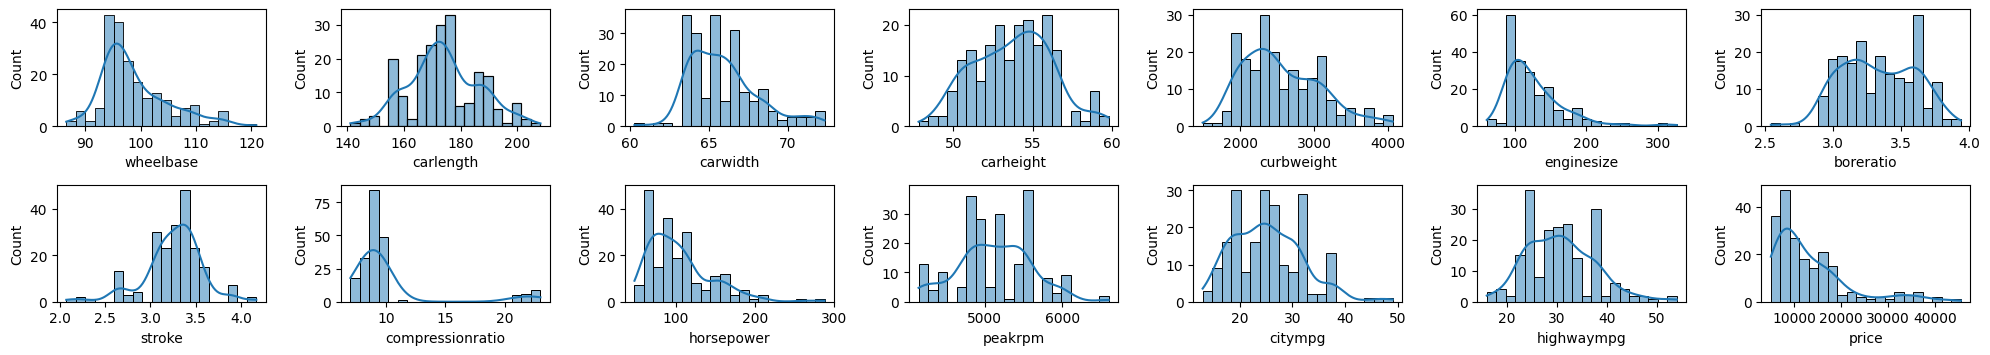

In [70]:
# Distribución de las variables numéricas.
numerical_features = [
    'wheelbase',        # Distancia entre los ejes del vehículo.
    'carlength',        # Longitud total del vehículo.
    'carwidth',         # Ancho del vehículo.
    'carheight',        # Altura del vehículo.
    'curbweight',       # Peso del vehículo sin pasajeros ni carga.
    'enginesize',       # Tamaño del motor.
    'boreratio',        # Relación entre el diámetro del cilindro y la carrera del pistón.
    'stroke',           # Longitud de la carrera del pistón.
    'compressionratio', # Relación de compresión del motor.
    'horsepower',       # Potencia del motor en caballos de fuerza.
    'peakrpm',          # Revoluciones por minuto en el pico de potencia.
    'citympg',          # Millas por galón (MPG) en conducción urbana. | 1 MPG = 0.425144 km/l
    'highwaympg',       # Millas por galón (MPG) en conducción en carretera. | 1 MPG = 0.425144 km/l
    'price'             # Precio del vehículo.
]

# Visualización de la distribución de las variables numéricas.
plt.figure(figsize=(20, 12)) 
for i, feature in enumerate(numerical_features):
    plt.subplot(7, 7, i+1)
    sns.histplot(data=df[feature], bins=20, kde=True) # Histograma con 20 barras y visualización de la densidad.
    plt.tight_layout() # Ajustar el espacio entre las gráficas.
plt.show()

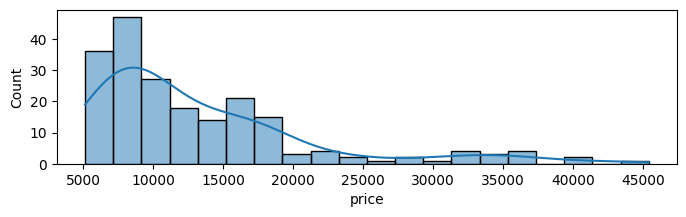

In [71]:
# Análisis exclusivo de la variable 'price'.
plt.figure(figsize=(8, 2))
sns.histplot(data=df['price'], bins=20, kde=True) # Histograma con 20 barras y visualización de la densidad.
plt.show()

In [72]:
# Extraer la marca y el modelo del nombre del vehículo.
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df['model'] = df['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# Definir las columnas categóricas y numéricas.
categorical_columns = [
    'fueltype',
    'aspiration', 
    'doornumber', 
    'carbody', 
    'drivewheel', 
    'enginelocation', 
    'enginetype', 
    'cylindernumber', 
    'fuelsystem', 
    'brand', 
    'model'
]

numerical_columns = [
    'wheelbase', 
    'carlength', 
    'carwidth', 
    'carheight', 
    'curbweight',
    'enginesize', 
    'boreratio', 
    'stroke', 
    'compressionratio', 
    'horsepower',
    'peakrpm', 
    'citympg', 
    'highwaympg'
]

# Codificación de las columnas categóricas.
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Definir nuevas columnas a partir de las columnas numéricas.
df['power_to_weight_ratio'] = df['horsepower'] / df['curbweight'] # Formula: Potencia / Peso. Para medir la eficiencia del motor.
for column in numerical_columns:
    df[f'{column}_squared'] = df[column] ** 2 # Elevar al cuadrado las columnas numéricas.
df['log_enginesize'] = np.log(df['enginesize'] + 1) # Aplicar logaritmo natural a la columna 'enginesize'.

# StandardScaler calcula la media y la desviación estándar de cada columna y luego aplica esta fórmula a todos los valores en esa columna.
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [73]:
# Dividir el dataset.
X = df.drop(columns=['CarName', 'price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo.
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones.
y_pred = model.predict(X_test)

In [85]:
# Evaluar el modelo.
mse = mean_squared_error(y_test, y_pred) # Calcular el error cuadrático medio.
r2_square = r2_score(y_test,y_pred) # Calcular el coeficiente de determinación.
print(f"R-squared: {r2_square:.4f}") # Si el valor es cercano a 1, el modelo es bueno.
print(f'Mean Squared Error: {mse}')

R-squared: 0.8616
Mean Squared Error: 10928450.668414652


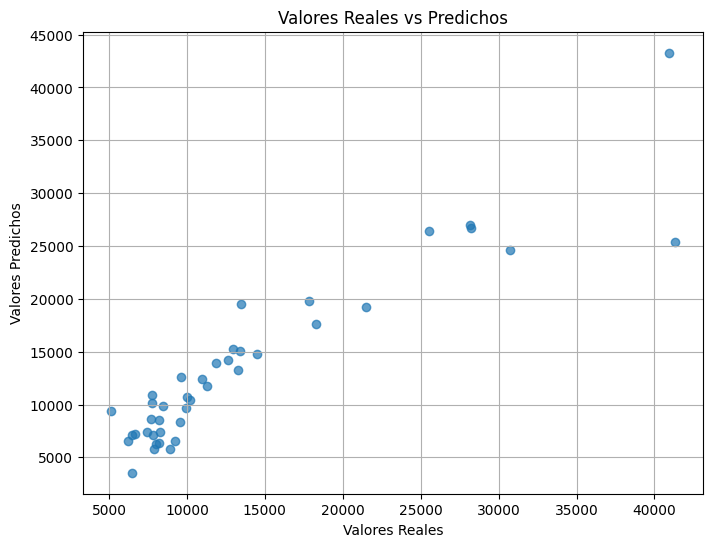

In [80]:
# Gráfico de dispersión entre valores reales y predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Valores Reales vs Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.grid(True)
plt.show()

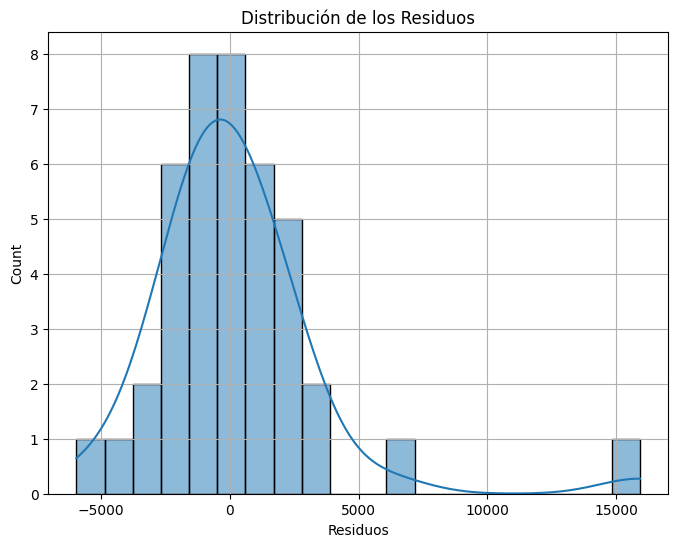

In [81]:
# Evaluación de los residuos.
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.title('Distribución de los Residuos')
plt.xlabel('Residuos')
plt.grid(True)
plt.show()


### Interpretación del gráfico:

**Forma de la distribución:**

La mayoría de los residuos están cerca de 0, lo cual es un buen indicador de que el modelo está haciendo predicciones razonables para la mayoría de los datos.
Sin embargo, la distribución es ligeramente asimétrica hacia la derecha, lo que indica que el modelo tiende a subestimar los valores reales en algunos casos (predicciones más bajas que los valores reales).

**Residuos extremos (outliers):**

Hay residuos positivos significativos que llegan hasta 15,000, lo que sugiere que hay predicciones donde el modelo subestima considerablemente los valores reales.
Por el lado negativo, los residuos no son tan extremos, lo que indica que el modelo no tiende a sobreestimar de manera severa.

**Comportamiento del modelo:**

Un modelo ideal debería tener una distribución de residuos simétrica y centrada en 0, sin valores extremos significativos.
Aquí, los residuos sugieren que el modelo tiene un mejor desempeño en rangos intermedios de precios, pero falla en capturar correctamente las dinámicas de precios altos, como vimos en el gráfico de dispersión.